In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import pathlib
from pathlib import Path
import re

In [184]:
## vilken mapp vill du kolla i?
mapp = 'protein-peptide_sample_inf'
## Skapar en lista över excelfilerna i mappen
files = os.listdir(mapp)
files_xls = [f for f in files if f[-3:] == 'lsx']
files_xls
## Läser in filerna 1 och 1 och appendar dom i df
df = pd.DataFrame()
for f in files_xls:
    data = pd.read_excel(mapp + '/' + f)
    ## Tar bort duplikat peptider eftersom protein-peptid filerna har duplicater inom t.ex hemoglobin
    data.drop_duplicates(subset='Peptide', inplace=True, ignore_index=True)
    df = df.append(data)
df

,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature,#Feature Sample 31,Start,End,PTM,AScore,Area Sample 34,#Feature Sample 34,Area Sample 39,#Feature Sample 39
0,1,137976,sp|P69905|HBA_HUMAN,K.TNVKAAWGKVGAHAGEYGAEALERMFL.S,Y,92.76,2875.4438,27,1.9,959.4904,...,4,4.0,9,35,NaN,NaN,NaN,NaN,NaN,NaN
1,1,137976,sp|P69905|HBA_HUMAN,K.TNVKAAWGKVGAHAGEYGAEALER.M,Y,91.89,2484.2510,24,0.6,622.0704,...,15,15.0,9,32,NaN,NaN,NaN,NaN,NaN,NaN
2,1,137976,sp|P69905|HBA_HUMAN,K.AAWGKVGAHAGEYGAEALERMFL.S,Y,91.79,2433.1899,23,3.6,1217.6066,...,4,4.0,13,35,NaN,NaN,NaN,NaN,NaN,NaN
3,1,137976,sp|P69905|HBA_HUMAN,V.DDMPNALSALSDLHAHKLRVDPV.N,Y,91.73,2513.2695,23,2.1,629.3260,...,4,4.0,75,97,NaN,NaN,NaN,NaN,NaN,NaN
4,1,137976,sp|P69905|HBA_HUMAN,M.VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFL.S,Y,90.15,3585.8401,34,2.6,897.4697,...,9,9.0,2,35,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,247,138435,sp|P08603|CFAH_HUMAN,V.TAPENGKIV.S,Y,23.46,927.5025,9,4.3,464.7605,...,1,NaN,150,158,NaN,NaN,NaN,NaN,75600.0,1.0
4743,198,138287,sp|P06703|S10A6_HUMAN,K.LQDAEIAR.L,Y,25.16,914.4821,8,-0.6,458.2480,...,2,NaN,48,55,NaN,NaN,NaN,NaN,266000.0,2.0
4744,198,138287,sp|P06703|S10A6_HUMAN,A.LIYNEALKG,Y,21.63,1019.5651,9,-0.4,510.7896,...,1,NaN,82,90,NaN,NaN,NaN,NaN,259000.0,1.0
4745,165,138462,sp|Q7KZ85|SPT6H_HUMAN,S.HQVQEWNRQRTMAIER.A,Y,24.38,2081.0337,16,5.0,521.2683,...,0,NaN,700,715,NaN,NaN,NaN,NaN,0.0,0.0


In [185]:
## Vad för typ av fil hanterar du? (vilka kolummner önskas ha kvar)
peptide = ['Accession', 'Peptide', 'Mass', 'Length', '#Feature', '-10lgP']
protein = ['Protein Accession', 'Peptide', 'Mass', 'Length', '#Feature', '-10lgP', 'Start', 'End']
## Formatera dataframen
df = df[protein]
df

,Protein Accession,Peptide,Mass,Length,#Feature,-10lgP,Start,End
0,sp|P69905|HBA_HUMAN,K.TNVKAAWGKVGAHAGEYGAEALERMFL.S,2875.4438,27,4,92.76,9,35
1,sp|P69905|HBA_HUMAN,K.TNVKAAWGKVGAHAGEYGAEALER.M,2484.2510,24,15,91.89,9,32
2,sp|P69905|HBA_HUMAN,K.AAWGKVGAHAGEYGAEALERMFL.S,2433.1899,23,4,91.79,13,35
3,sp|P69905|HBA_HUMAN,V.DDMPNALSALSDLHAHKLRVDPV.N,2513.2695,23,4,91.73,75,97
4,sp|P69905|HBA_HUMAN,M.VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFL.S,3585.8401,34,9,90.15,2,35
...,...,...,...,...,...,...,...,...
4742,sp|P08603|CFAH_HUMAN,V.TAPENGKIV.S,927.5025,9,1,23.46,150,158
4743,sp|P06703|S10A6_HUMAN,K.LQDAEIAR.L,914.4821,8,2,25.16,48,55
4744,sp|P06703|S10A6_HUMAN,A.LIYNEALKG,1019.5651,9,1,21.63,82,90
4745,sp|Q7KZ85|SPT6H_HUMAN,S.HQVQEWNRQRTMAIER.A,2081.0337,16,0,24.38,700,715


In [196]:
## Tar bort allt ur kolummn som inte är bokstäver
df['Peptide'] = df['Peptide'].str.replace('[^a-zA-Z]', '')
df

<ipython-input-196-1075f3eb7dfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Peptide'] = df['Peptide'].str.replace('[^a-zA-Z]', '')


,Protein Accession,Peptide,Mass,Length,#Feature,-10lgP,Start,End
0,sp|P69905|HBA_HUMAN,KTNVKAAWGKVGAHAGEYGAEALERMFLS,2875.4438,27,4,92.76,9,35
1,sp|P69905|HBA_HUMAN,KTNVKAAWGKVGAHAGEYGAEALERM,2484.2510,24,15,91.89,9,32
2,sp|P69905|HBA_HUMAN,KAAWGKVGAHAGEYGAEALERMFLS,2433.1899,23,4,91.79,13,35
3,sp|P69905|HBA_HUMAN,VDDMPNALSALSDLHAHKLRVDPVN,2513.2695,23,4,91.73,75,97
4,sp|P69905|HBA_HUMAN,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLS,3585.8401,34,9,90.15,2,35
...,...,...,...,...,...,...,...,...
4742,sp|P08603|CFAH_HUMAN,VTAPENGKIVS,927.5025,9,1,23.46,150,158
4743,sp|P06703|S10A6_HUMAN,KLQDAEIARL,914.4821,8,2,25.16,48,55
4744,sp|P06703|S10A6_HUMAN,ALIYNEALKG,1019.5651,9,1,21.63,82,90
4745,sp|Q7KZ85|SPT6H_HUMAN,SHQVQEWNRQRTMAIERA,2081.0337,16,0,24.38,700,715


In [159]:
## sortera bort om feature<4
df = df.loc[(df['#Feature'] >= 4)] 
## Skapa column "count"
df.insert(5,'count', 1)
df

,Protein Accession,Peptide,Mass,Length,#Feature,count,-10lgP,Start,End
0,sp|P69905|HBA_HUMAN,K.TNVKAAWGKVGAHAGEYGAEALERMFL.S,2875.4438,27,4,1,92.76,9,35
1,sp|P69905|HBA_HUMAN,K.TNVKAAWGKVGAHAGEYGAEALER.M,2484.2510,24,15,1,91.89,9,32
2,sp|P69905|HBA_HUMAN,K.AAWGKVGAHAGEYGAEALERMFL.S,2433.1899,23,4,1,91.79,13,35
3,sp|P69905|HBA_HUMAN,V.DDMPNALSALSDLHAHKLRVDPV.N,2513.2695,23,4,1,91.73,75,97
4,sp|P69905|HBA_HUMAN,M.VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFL.S,3585.8401,34,9,1,90.15,2,35
...,...,...,...,...,...,...,...,...,...
4661,sp|Q8NFI4|F10A5_HUMAN,F.TDAIKLNPRLAI.L,1323.7874,12,4,1,46.75,138,149
4670,sp|Q8IWB9|TEX2_HUMAN,T.PPSAHKYH.K,935.4613,8,9,1,41.03,518,525
4685,sp|P52209|6PGD_HUMAN,Y.ELLAKPGQFI.H,1114.6385,10,4,1,30.82,456,465
4718,sp|P02747|C1QC_HUMAN,V.TRQTHQPPAPNSLI.R,1558.8215,14,4,1,35.75,125,138


In [151]:
## Skapa en DataFrame av de som endast finns i alla
df_same = pd.DataFrame()
df_same = df

## Gruppera efter Peptide och summera siffror (mergear duplikater)
df_same = df_same.groupby(['Peptide'], as_index=False).sum()
## Sortera efter count
df_same = df_same.sort_values(by=['count'], axis=0, ascending=False)

## OBS!! måste ändra till rätt filantal! (Skapa nytt dataset med endast count 3 (denna har alltså funnits i alla filer = same))
df_same = df_same.loc[df_same['count'] == 3] 

## endast de peptider som finns i alla
df_same

,Peptide,Mass,Length,#Feature,count,-10lgP,Start,End
1062,P.HFDLSHGSAQ.V,3292.4670,30,18,3,150.33,138,165
1418,V.NVDEVGGEALGRLLV.V,4619.4771,45,26,3,175.67,60,102
889,L.SHGSAQVK.G,2437.2423,24,15,3,124.66,150,171
244,E.VGGEALGRLLV.V,3247.9344,33,14,3,132.02,72,102
1438,V.SLGSPSGEVSHPRKT.R,4613.3544,45,28,3,138.60,975,1017
...,...,...,...,...,...,...,...,...
986,M.VHLTPEEKSAV.T,3625.9200,33,78,3,161.89,6,36
77,A.HLDNLKGT.F,2689.4148,24,13,3,113.67,234,255
989,M.VHLTPEEKSAVTAL.W,4481.4270,42,35,3,163.38,6,45
80,A.HLDNLKGTFA.T,3343.7310,30,23,3,140.38,234,261


,Protein Accession,Peptide,Mass,Length,#Feature,count,-10lgP,Start,End
0,sp|P69905|HBA_HUMAN,K.TNVKAAWGKVGAHAGEYGAEALERMFL.S,2875.4438,27,4,1,92.76,9,35
1,sp|P69905|HBA_HUMAN,K.TNVKAAWGKVGAHAGEYGAEALER.M,2484.2510,24,15,1,91.89,9,32
2,sp|P69905|HBA_HUMAN,K.AAWGKVGAHAGEYGAEALERMFL.S,2433.1899,23,4,1,91.79,13,35
3,sp|P69905|HBA_HUMAN,V.DDMPNALSALSDLHAHKLRVDPV.N,2513.2695,23,4,1,91.73,75,97
4,sp|P69905|HBA_HUMAN,M.VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFL.S,3585.8401,34,9,1,90.15,2,35
...,...,...,...,...,...,...,...,...,...
4661,sp|Q8NFI4|F10A5_HUMAN,F.TDAIKLNPRLAI.L,1323.7874,12,4,1,46.75,138,149
4670,sp|Q8IWB9|TEX2_HUMAN,T.PPSAHKYH.K,935.4613,8,9,1,41.03,518,525
4685,sp|P52209|6PGD_HUMAN,Y.ELLAKPGQFI.H,1114.6385,10,4,1,30.82,456,465
4718,sp|P02747|C1QC_HUMAN,V.TRQTHQPPAPNSLI.R,1558.8215,14,4,1,35.75,125,138


In [79]:
mapp = 'protein-peptide_sample_inf/'
dir_list = os.listdir(mapp)
print(dir_list)

['protein-peptides_sample_31.xlsx', 'protein-peptides_sample_34.xlsx', 'protein-peptides_sample_39.xlsx']


In [ ]:

df['N-cut']=df['Peptide'].apply(lambda x: x[0:4])
df['C-cut']=df['Peptide'].apply(lambda x: x[len(x):len(x)-5:-1])
df['Mass']=df['Mass']/df['count']
df['Length']=df['Length']/df['count']

df = df.sort_values(['count','#Feature'], ascending=False)

print("Average length: "+str(df['Length'].mean()))
print("Average mass: "+str(df['Mass'].mean()))
df

,Peptide,Mass,Length,RT,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count,N-cut,C-cut
Accession,,,,,,,,,,,,,
sp|Q04206|TF65_HUMAN,PSLQAPVR,866.4974,8.0,74.40,160,23.0,8.0,38.0,52.0,38.0,5,PSLQ,RVPA
sp|P02652|APOA2_HUMAN,NFLSYFVELGTQPATQ,1813.8887,16.0,589.24,55,11.0,14.0,9.0,9.0,12.0,5,NFLS,QTAP
sp|P69905|HBA_HUMAN,GEYGAEALERM(+15.99)FL,1500.6918,13.0,495.22,46,8.0,10.0,10.0,8.0,10.0,5,GEYG,LF)9
sp|P69905|HBA_HUMAN,HAGEYGAEALERM(+15.99)FL,1708.7878,15.0,394.46,45,9.0,13.0,11.0,5.0,7.0,5,HAGE,LF)9
sp|P02671|FIBA_HUMAN,DSGEGDFLAEGGGVR,1464.6481,15.0,250.89,43,4.0,9.0,11.0,13.0,6.0,5,DSGE,RVGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
sp|Q9UHI8|ATS1_HUMAN,DLELRPDSS,1030.4930,9.0,26.03,4,0.0,0.0,0.0,0.0,4.0,1,DLEL,SSDP
sp|Q9ULI3|HEG1_HUMAN,ALSLAPLAGAGLELQLE,1664.9348,17.0,116.13,4,0.0,0.0,4.0,0.0,0.0,1,ALSL,ELQL
sp|Q9Y4L1|HYOU1_HUMAN,VLDLPDLPED,1124.5601,10.0,104.07,4,0.0,0.0,4.0,0.0,0.0,1,VLDL,DEPL


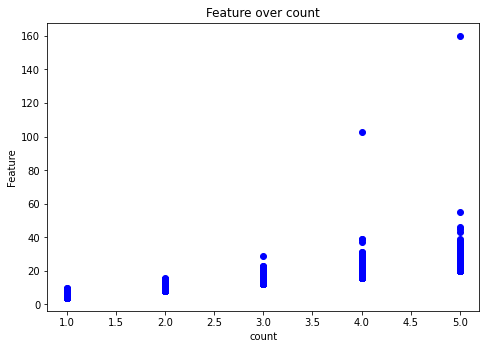

In [20]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['count'], df['#Feature'], color='b')
ax.set_xlabel('count')
ax.set_ylabel('Feature')
ax.set_title('Feature over count')
plt.show()

In [21]:
df.sort_values(['#Feature'], ascending=False)

,Peptide,Mass,Length,RT,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count,N-cut,C-cut
Accession,,,,,,,,,,,,,
sp|Q04206|TF65_HUMAN,PSLQAPVR,866.4974,8.0,74.40,160,23.0,8.0,38.0,52.0,38.0,5,PSLQ,RVPA
sp|P01009|A1AT_HUMAN,AVLTIDEKGTEAAGAM(+15.99)F,1738.8447,17.0,270.21,103,6.0,0.0,47.0,12.0,38.0,4,AVLT,F)99
sp|P02652|APOA2_HUMAN,NFLSYFVELGTQPATQ,1813.8887,16.0,589.24,55,11.0,14.0,9.0,9.0,12.0,5,NFLS,QTAP
sp|P69905|HBA_HUMAN,GEYGAEALERM(+15.99)FL,1500.6918,13.0,495.22,46,8.0,10.0,10.0,8.0,10.0,5,GEYG,LF)9
sp|P69905|HBA_HUMAN,HAGEYGAEALERM(+15.99)FL,1708.7878,15.0,394.46,45,9.0,13.0,11.0,5.0,7.0,5,HAGE,LF)9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
sp|P02768|ALBU_HUMAN,LEVDETYVPKEF,1467.7133,12.0,77.50,4,0.0,0.0,0.0,0.0,4.0,1,LEVD,FEKP
sp|P02768|ALBU_HUMAN,LLLRLAKTYET,1319.7812,11.0,40.74,4,4.0,0.0,0.0,0.0,0.0,1,LLLR,TEYT
sp|P02768|ALBU_HUMAN,VFDEFKPL,993.5171,8.0,71.04,4,4.0,0.0,0.0,0.0,0.0,1,VFDE,LPKF


In [22]:
df=df.groupby(['Accession', 'N-cut']).sum()
df.reset_index([ 'N-cut'], inplace=True)
df=df.sort_values(['count'], ascending=False)
df#sorted by accession and then N-cut. TYFP is found 41 times in HBA_HUMAN

,N-cut,Mass,Length,RT,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count
Accession,,,,,,,,,,,
sp|P69905|HBA_HUMAN,TYFP,15405.0137,130.0,2788.03,229,53.0,54.0,59.0,10.0,53.0,41
sp|P06727|APOA4_HUMAN,SLAE,16998.3139,159.0,1951.78,167,23.0,36.0,34.0,43.0,30.0,32
sp|P02671|FIBA_HUMAN,STGK,18535.7539,171.0,2840.88,136,22.0,36.0,39.0,30.0,9.0,31
sp|P02671|FIBA_HUMAN,DTAS,18909.7351,178.0,2897.98,149,19.0,28.0,42.0,36.0,24.0,31
sp|P69905|HBA_HUMAN,SLDK,13566.4107,126.0,2783.12,153,44.0,43.0,26.0,0.0,40.0,30
...,...,...,...,...,...,...,...,...,...,...,...
sp|P06733|ENOA_HUMAN,AVPS,1576.7983,16.0,108.58,4,0.0,0.0,0.0,0.0,4.0,1
sp|P06733|ENOA_HUMAN,GIYE,906.4698,8.0,103.36,4,0.0,0.0,0.0,0.0,4.0,1
sp|P06733|ENOA_HUMAN,GM(+,1088.4485,10.0,87.10,4,0.0,0.0,0.0,0.0,4.0,1


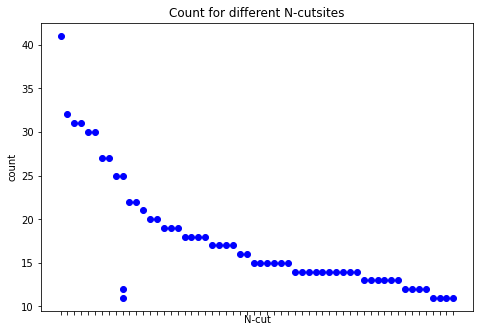

In [28]:
df_count10 = df.loc[(df['count'] >= 10)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_count10['N-cut'], df_count10['count'], color='b')
ax.set_xlabel('N-cut')
for label in ax.get_xticklabels():
    label.set_visible(False)
    
ax.set_ylabel('count')
ax.set_title('Count for different N-cutsites')
plt.show()